# Chapter 9: Nonparametric Tests

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import wilcoxon

In [2]:
admission = pd.read_csv('../data/admission.csv')

In [3]:
def p_2tail(sampdist,tstat):
    hyp = np.mean(sampdist)
    cutoff1 = hyp - np.abs(hyp - tstat)
    cutoff2 = hyp + np.abs(hyp - tstat)
    
    points = sns.kdeplot(sampdist).get_lines()[0].get_data() # get x and y values from plot
    x = points[0]
    y = points[1]

    plt.fill_between(x,y, where = (x < cutoff1) | (x > cutoff2), color='r')
    plt.fill_between(x,y, where = (x >= cutoff1) & (x <= cutoff2), color='g')
    plt.show()
    
    pvalue = sum((sampdist < cutoff1) | (sampdist > cutoff2)) / len(sampdist)
    return pvalue

In [4]:
def p_rtail(sampdist,tstat):
    points = sns.kdeplot(sampdist).get_lines()[0].get_data() # get x and y values from plot
    x = points[0]
    y = points[1]

    plt.fill_between(x,y, where = x > tstat, color='r')
    plt.fill_between(x,y, where = x <= tstat, color='g')
    plt.show()
    
    #pvalue = np.sum(sampdist > tstat) / len(sampdist)
    sampdist_filtered = list(filter(lambda sampdist: sampdist > tstat, sampdist))
    pvalue = len(sampdist_filtered)/len(sampdist)
    return pvalue

## Median Test
Test where the null hypothesis (median GMAT score is 510):

In [5]:
np.random.seed(87654321)
sampsize = len(admission)
def f1():
    s1 = np.random.normal(size=sampsize, loc=510, scale=admission.std()['GMAT'])
    return np.median(s1)
sampdist = [f1() for _ in range(10000)]

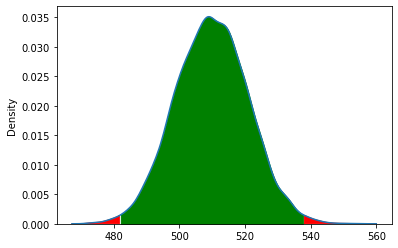

0.0118

In [6]:
tstat = admission.median()['GMAT']
p_2tail(sampdist,tstat)

Let's do the nonparametric test for median:

In [7]:
np.random.seed(87654321)
sampsize = len(admission)
def f1():
    s1 = np.random.choice([0,1], size=sampsize, replace=True, p= [.5,.5])
    return (sum(s1)/sampsize)
sampdist = [f1() for _ in range(10000)]

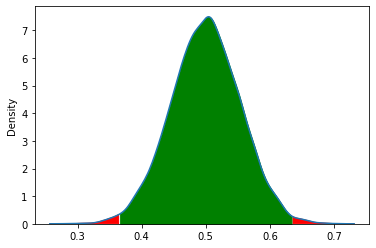

0.012

In [8]:
tstat = len(admission.loc[admission['GMAT']>510])/sampsize
p_2tail(sampdist, tstat)

Let's do a signed rank test:

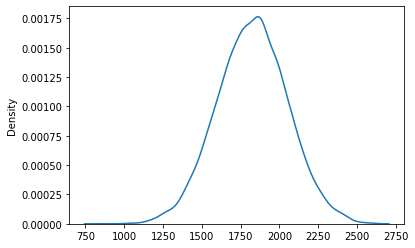

In [9]:
np.random.seed(87654321)
sampsize = len(admission)
def f1():
    s1 = np.random.choice([0,1], size=sampsize, replace=True, p= [.5,.5])
    r1 = np.linspace(1, sampsize, sampsize)
    x = sum(r1[s1==1])
    return x
sampdist = [f1() for _ in range(10000)]
sns.kdeplot(sampdist)
plt.show()

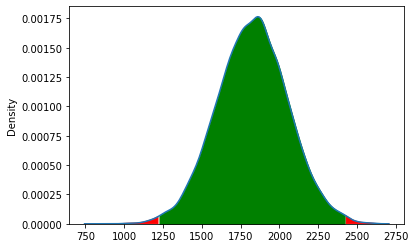

0.0082

In [10]:
sign_gmat = np.where(admission['GMAT']<510, 0, 1)
dev_gmat = np.absolute(admission['GMAT']-510)
df = pd.DataFrame({'sign_gmat':sign_gmat, 'dev_gmat':dev_gmat})
df.sort_values('dev_gmat', inplace=True)
df['rank_gmat'] = np.arange(1, len(df)+1)
tstat = sum(df.loc[df['sign_gmat']==1]['rank_gmat'])
p_2tail(sampdist, tstat)

In [11]:
print(tstat)

1225


In [12]:
w, p = wilcoxon(admission['GMAT'])
w, p

'''
pvalue is different from the estimation in R using a built-in function wilcox.test
because the scipy library is based on the normal distribution.
Hence, the given R codes cannot be equivalently exchanged in Python
'''

'\npvalue is different from the estimation in R using a built-in function wilcox.test\nbecause the scipy library is based on the normal distribution.\nHence, the given R codes cannot be equivalently exchanged in Python\n'

## Two Sample Test

Let's shuffle the elements in a vector:

In [13]:
v = (1, 2, 3, 4, 5)
np.random.choice(v, size=len(v))

array([4, 3, 1, 4, 1])

Load the data:

In [14]:
twosample = pd.read_csv('../data/twosample.csv')
twosample.groupby('group').count()

,score
group,
Control,23
Treatment,21


Test the Hypothesis: There is no difference in the mean of the `Treatment` and `Control` groups

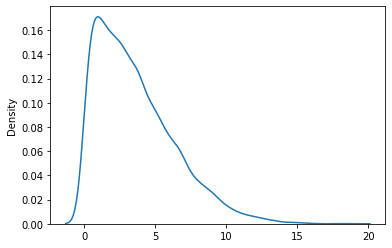

In [15]:
np.random.seed(87654321)
def f1():
    pool = twosample['score']
    s1 = np.random.choice(pool, size=len(pool))
    control1 = s1[:23]
    treatment1 = s1[23:]
    return abs(treatment1.mean()-control1.mean())
sampdist = [f1() for _ in range(10000)]
sns.kdeplot(sampdist)
plt.show()

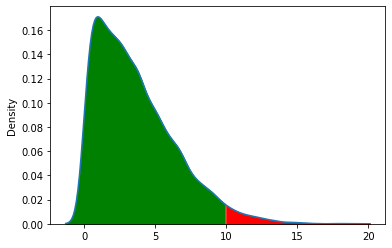

0.0285

In [16]:
tstat = abs(twosample['score'][:21].mean() - twosample['score'][21:].mean())
p_rtail(sampdist, tstat)

## Correlation Test

In [17]:
immer = pd.read_csv('../data/immer.csv')

In [18]:
immer.head(10)

,Loc,Var,Y1,Y2
0,UF,M,81.0,80.7
1,UF,S,105.4,82.3
2,UF,V,119.7,80.4
3,UF,T,109.7,87.2
4,UF,P,98.3,84.2
5,W,M,146.6,100.4
6,W,S,142.0,115.5
7,W,V,150.7,112.2
8,W,T,191.5,147.7
9,W,P,145.7,108.1


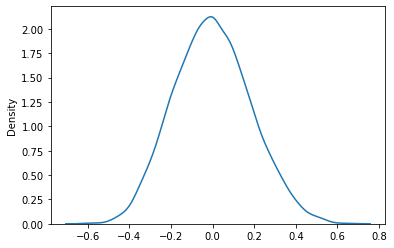

In [19]:
np.random.seed(87654321)
def f1():
    s1 = pd.DataFrame([immer['Y1'].sample(n=len(immer))]).T
    s2 = pd.DataFrame([immer['Y1'].sample(n=len(immer))]).T
    return (np.corrcoef(s1['Y1'], s2['Y1'])[0][1])
sampdist = [f1() for _ in range(10000)]
sns.kdeplot(sampdist)
plt.show()

In [20]:
s1 = pd.DataFrame([immer['Y1'].sample(n=len(immer))]).T
s2 = pd.DataFrame([immer['Y1'].sample(n=len(immer))]).T
np.corrcoef(s1['Y1'], s2['Y1'])

array([[ 1.        , -0.18991212],
       [-0.18991212,  1.        ]])

<ipython-input-21-86aa6c8e3bb4>:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


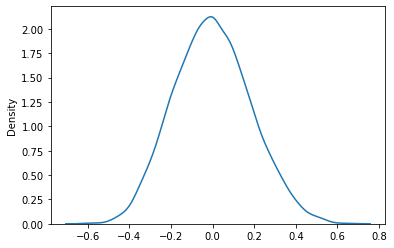

In [21]:
from scipy.stats.stats import pearsonr

np.random.seed(87654321)
def f1():
    s1 = pd.DataFrame([immer['Y1'].sample(n=len(immer))]).T
    s2 = pd.DataFrame([immer['Y1'].sample(n=len(immer))]).T
    return (pearsonr(s1['Y1'], s2['Y1'])[0])
sampdist = [f1() for _ in range(10000)]
sns.kdeplot(sampdist)
plt.show()

In [22]:
s1 = pd.DataFrame([immer['Y1'].sample(n=len(immer))]).T
s2 = pd.DataFrame([immer['Y1'].sample(n=len(immer))]).T
pearsonr(s1['Y1'], s2['Y1'])

(-0.18991211900401728, 0.3148111182272324)

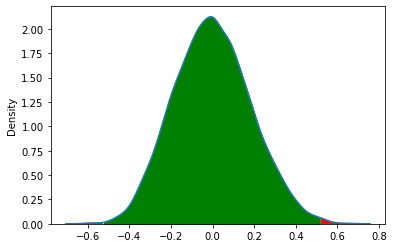

0.0034

In [23]:
tstat = pearsonr(immer['Y1'], immer['Y2'])[0]
p_2tail(sampdist, tstat)

## Bootstrapping

In [24]:
bootsampdist = [immer['Y1'].sample(n=len(immer), replace=True).mean() for _ in range(10000)]

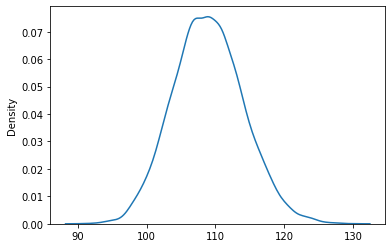

In [25]:
sns.kdeplot(bootsampdist)
plt.show()

## Synthetic Data and GANs

In [26]:
admission.head()

,GPA,GMAT,De
0,2.96,596,admit
1,3.14,473,admit
2,3.22,482,admit
3,3.29,527,admit
4,3.69,505,admit


In [27]:
from synthpop import Synthpop
spop = Synthpop()
dtypes = {"GPA": 'float', "GMAT": 'int', 'De':'category'}
spop.fit(admission, dtypes)
s1 = spop.generate(len(admission))
s1.head()

train_GPA
train_GMAT
train_De
generate_GPA
generate_GMAT
generate_De


,GPA,GMAT,De
0,2.85,483,border
1,3.60,552,admit
2,2.86,494,border
3,3.69,521,admit
4,3.38,431,admit


In [28]:
np.random.uniform(low=admission.GPA.min(), high=admission.GPA.max(), size=50).round(2)

array([3.8 , 2.51, 2.41, 2.71, 2.61, 3.26, 3.09, 3.77, 2.65, 2.7 , 3.09,
       3.08, 3.57, 2.44, 2.99, 2.38, 2.23, 3.49, 3.49, 2.45, 3.1 , 2.64,
       2.25, 2.42, 2.92, 2.64, 2.65, 2.47, 2.92, 2.68, 2.37, 2.13, 3.13,
       3.51, 3.47, 2.8 , 2.18, 3.27, 2.72, 3.73, 3.61, 2.9 , 3.29, 2.39,
       3.26, 3.35, 3.69, 3.48, 3.55, 2.42])